# Predictions & simulations - Project 1
## Report created by Artem Beregovskykh, Joanna Mateuszczyk, Juliusz Pronobis-Szczylik, Wenjiao Zhou


### Importing libraries

In [162]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import scipy.stats as stats

import statsmodels
import statsmodels.api as sm
import statsmodels.tsa.api as tsa

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller, kpss
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Importing datasets

In [163]:
df1 = pd.read_csv('/Users/m/Downloads/Pred_and_simulations-main/Data/Spain stock index(^IBEX)_EUR.csv',parse_dates=['Date'])

In [164]:
df2 = pd.read_csv('/Users/m/Downloads/Pred_and_simulations-main/Data/USDJPY_JPY.csv', parse_dates=['Date'])

In [165]:
df3 = pd.read_csv('/Users/m/Downloads/IRLTLT01ESM156N.csv',parse_dates=['DATE'])

In [166]:
df4 = pd.read_csv('/Users/m/Downloads/INDPRO (2).csv',parse_dates=['DATE'])

In [167]:
df5 = pd.read_csv('/Users/m/Downloads/XTEITT01CNM156S.csv', parse_dates=['DATE'])

### Plotting every dataset

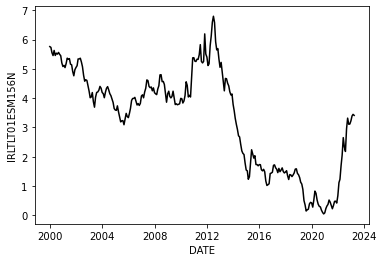

In [169]:
sns.lineplot(x="DATE", y="IRLTLT01ESM156N", data=df3, color='black') #We plot every other time-series the same way
plt.show()

### Performing the root-tests

In [170]:
# Perform the Phillips-Perron (PP) test on IBEX
pp_result = kpss(df1['IBEX'])
print('PP Statistic: ', pp_result[0])
print('p-value: ', pp_result[1])
print('Critical Values: ', pp_result[3])

PP Statistic:  0.16443475899189314
p-value:  0.1
Critical Values:  {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


In [171]:
# Perform the Phillips-Perron (PP) test on USD/JPY
pp_result = kpss(df2['USD/JPY'])
print('PP Statistic: ', pp_result[0])
print('p-value: ', pp_result[1])
print('Critical Values: ', pp_result[3])

PP Statistic:  0.25820142590401524
p-value:  0.1
Critical Values:  {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


In [172]:
# Perform the Phillips-Perron (PP) test on IRLTLT01ESM156N
pp_result = kpss(df3['IRLTLT01ESM156N'])
print('PP Statistic: ', pp_result[0])
print('p-value: ', pp_result[1])
print('Critical Values: ', pp_result[3])

PP Statistic:  1.1339080274999926
p-value:  0.01
Critical Values:  {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


In [173]:
# Perform the Phillips-Perron (PP) test on INDPRO
pp_result = kpss(df4['INDPRO'])
print('PP Statistic: ', pp_result[0])
print('p-value: ', pp_result[1])
print('Critical Values: ', pp_result[3])

PP Statistic:  0.8604690731681751
p-value:  0.01
Critical Values:  {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


In [142]:
# Perform the Phillips-Perron (PP) test on XTEITT01CNM156S
pp_result = kpss(df5['XTEITT01CNM156S'])
print('PP Statistic: ', pp_result[0])
print('p-value: ', pp_result[1])
print('Critical Values: ', pp_result[3])

PP Statistic:  0.7035165798496533
p-value:  0.013225765468213333
Critical Values:  {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


### Preparing for ADF tests

In [174]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")   

### Performing ADF tests

In [175]:
for name, column in df1.iteritems(): #Performing 
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "Date" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = 0.2913
 No. Lags Chosen       = 12
 Critical value 1%     = -3.455
 Critical value 5%     = -2.872
 Critical value 10%    = -2.573
 => P-Value = 0.9769. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "IBEX" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.5728
 No. Lags Chosen       = 3
 Critical value 1%     = -3.454
 Critical value 5%     = -2.872
 Critical value 10%    = -2.572
 => P-Value = 0.0988. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.




In [176]:
for name, column in df2.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "Date" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = 0.2913
 No. Lags Chosen       = 12
 Critical value 1%     = -3.455
 Critical value 5%     = -2.872
 Critical value 10%    = -2.573
 => P-Value = 0.9769. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "USD/JPY" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.7163
 No. Lags Chosen       = 10
 Critical value 1%     = -3.455
 Critical value 5%     = -2.872
 Critical value 10%    = -2.573
 => P-Value = 0.4227. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.




In [177]:
for name, column in df3.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "DATE" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = 0.293
 No. Lags Chosen       = 12
 Critical value 1%     = -3.455
 Critical value 5%     = -2.872
 Critical value 10%    = -2.573
 => P-Value = 0.977. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "IRLTLT01ESM156N" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.5191
 No. Lags Chosen       = 2
 Critical value 1%     = -3.454
 Critical value 5%     = -2.872
 Critical value 10%    = -2.572
 => P-Value = 0.5241. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.




In [178]:
for name, column in df4.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "DATE" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = 0.3082
 No. Lags Chosen       = 12
 Critical value 1%     = -3.455
 Critical value 5%     = -2.872
 Critical value 10%    = -2.573
 => P-Value = 0.9777. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "INDPRO" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.9242
 No. Lags Chosen       = 2
 Critical value 1%     = -3.454
 Critical value 5%     = -2.872
 Critical value 10%    = -2.572
 => P-Value = 0.3208. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.




In [179]:
for name, column in df5.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "DATE" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = 0.3082
 No. Lags Chosen       = 12
 Critical value 1%     = -3.455
 Critical value 5%     = -2.872
 Critical value 10%    = -2.573
 => P-Value = 0.9777. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "XTEITT01CNM156S" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.7786
 No. Lags Chosen       = 12
 Critical value 1%     = -3.455
 Critical value 5%     = -2.872
 Critical value 10%    = -2.573
 => P-Value = 0.3912. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.




### Performing differencing for each time–series

In [180]:
diff1 = pd.DataFrame(df1['IBEX'].diff()[1:])
diff1['Date'] = df1['Date']

In [181]:
diff2 = pd.DataFrame(df2['USD/JPY'].diff()[1:]) #
diff2['Date'] = df2['Date']

In [182]:
diff3 = pd.DataFrame(df3['IRLTLT01ESM156N'].diff()[1:]) #
diff3['Date'] = df3['DATE']

In [183]:
diff4 = pd.DataFrame(df4['INDPRO'].diff()[1:]) #
diff4['Date'] = df4['DATE']

In [184]:
diff5 = pd.DataFrame(df5['XTEITT01CNM156S'].diff()[1:]) #
diff5['Date'] = df5['DATE']

### Performing ADF tests

In [185]:
for name, column in diff1.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "IBEX" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -9.2854
 No. Lags Chosen       = 2
 Critical value 1%     = -3.454
 Critical value 5%     = -2.872
 Critical value 10%    = -2.572
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Date" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = 0.2992
 No. Lags Chosen       = 12
 Critical value 1%     = -3.455
 Critical value 5%     = -2.872
 Critical value 10%    = -2.573
 => P-Value = 0.9773. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.




In [186]:
for name, column in diff2.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "USD/JPY" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -4.4701
 No. Lags Chosen       = 9
 Critical value 1%     = -3.455
 Critical value 5%     = -2.872
 Critical value 10%    = -2.573
 => P-Value = 0.0002. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Date" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = 0.2992
 No. Lags Chosen       = 12
 Critical value 1%     = -3.455
 Critical value 5%     = -2.872
 Critical value 10%    = -2.573
 => P-Value = 0.9773. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.




In [187]:
for name, column in diff3.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "IRLTLT01ESM156N" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -11.5112
 No. Lags Chosen       = 1
 Critical value 1%     = -3.454
 Critical value 5%     = -2.872
 Critical value 10%    = -2.572
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Date" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = 0.3009
 No. Lags Chosen       = 12
 Critical value 1%     = -3.455
 Critical value 5%     = -2.872
 Critical value 10%    = -2.573
 => P-Value = 0.9774. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.




In [188]:
for name, column in diff4.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "INDPRO" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -12.5045
 No. Lags Chosen       = 1
 Critical value 1%     = -3.454
 Critical value 5%     = -2.872
 Critical value 10%    = -2.572
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Date" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = 0.3162
 No. Lags Chosen       = 12
 Critical value 1%     = -3.455
 Critical value 5%     = -2.873
 Critical value 10%    = -2.573
 => P-Value = 0.9781. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.




In [147]:
for name, column in diff5.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "XTEITT01CNM156S" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -6.4652
 No. Lags Chosen       = 11
 Critical value 1%     = -3.455
 Critical value 5%     = -2.872
 Critical value 10%    = -2.573
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Date" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = 0.3162
 No. Lags Chosen       = 12
 Critical value 1%     = -3.455
 Critical value 5%     = -2.873
 Critical value 10%    = -2.573
 => P-Value = 0.9781. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.




### Performing the Phillips-Perron tests on each differenced time-series

In [189]:
# Perform the Phillips-Perron (PP) test on differenced IBEX
pp_result = kpss(diff1['IBEX'])
print('PP Statistic: ', pp_result[0])
print('p-value: ', pp_result[1])
print('Critical Values: ', pp_result[3])

PP Statistic:  0.05302755571727718
p-value:  0.1
Critical Values:  {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


In [190]:
# Perform the Phillips-Perron (PP) test on differenced USD/JPY
pp_result = kpss(diff2['USD/JPY'])
print('PP Statistic: ', pp_result[0])
print('p-value: ', pp_result[1])
print('Critical Values: ', pp_result[3])

PP Statistic:  0.13804606855786142
p-value:  0.1
Critical Values:  {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


In [191]:
# Perform the Phillips-Perron (PP) test on differenced IRLTLT01ESM156N
pp_result = kpss(diff3['IRLTLT01ESM156N'])
print('PP Statistic: ', pp_result[0])
print('p-value: ', pp_result[1])
print('Critical Values: ', pp_result[3])

PP Statistic:  0.1480251035261125
p-value:  0.1
Critical Values:  {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


In [192]:
# Perform the Phillips-Perron (PP) test on differenced INDPRO
pp_result = kpss(diff4['INDPRO'])
print('PP Statistic: ', pp_result[0])
print('p-value: ', pp_result[1])
print('Critical Values: ', pp_result[3])

PP Statistic:  0.033472864233313394
p-value:  0.1
Critical Values:  {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


In [193]:
# Perform the Phillips-Perron (PP) test on differenced XTEITT01CNM156S
pp_result = kpss(diff5['XTEITT01CNM156S'])
print('PP Statistic: ', pp_result[0])
print('p-value: ', pp_result[1])
print('Critical Values: ', pp_result[3])

PP Statistic:  0.10330026226163716
p-value:  0.1
Critical Values:  {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
